Downloaded AMZN: 2516 days
Downloaded TGT: 2516 days
Downloaded COST: 2516 days
Downloaded BNED: 2377 days
Downloaded SCHL: 2516 days
Downloaded WLY: 2516 days
Downloaded NWSA: 2516 days
Downloaded NYT: 2516 days
Downloaded RELX: 2516 days
Downloaded TRI: 2516 days

Successfully downloaded 10 stocks
Available stocks: ['AMZN', 'TGT', 'COST', 'BNED', 'SCHL', 'WLY', 'NWSA', 'NYT', 'RELX', 'TRI']
Using 10 stocks
Portfolio daily return: 0.0006
Portfolio daily volatility: 0.0129

Running 1000 simulations...
Completed 200 simulations...
Completed 400 simulations...
Completed 600 simulations...
Completed 800 simulations...
Completed 1000 simulations...
MONTE CARLO RESULTS
Mean Annual Return: 16.88%
Median Annual Return: 14.65%
Standard Deviation: 23.59%
Best Case (95th percentile): 58.37%
Worst Case (5th percentile): -16.65%
Probability of positive returns: 75.5%


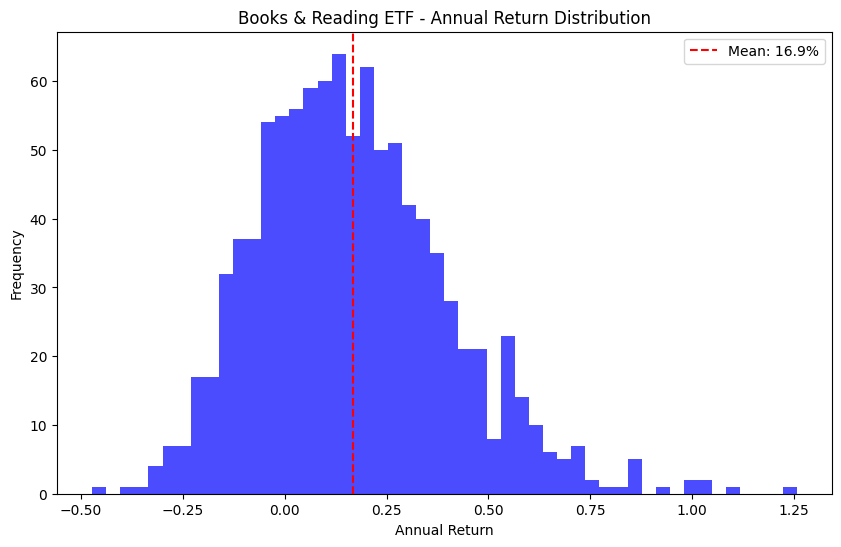

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Books & Reading ETF Portfolio
stocks = ['AMZN', 'TGT', 'COST', 'BNED', 'SCHL', 'WLY', 'NWSA', 'NYT', 'RELX', 'TRI']
weights = [0.15, 0.13, 0.12, 0.08, 0.09, 0.08, 0.10, 0.10, 0.08, 0.07]

print("Downloading stock data...")
stock_data = {}

for stock in stocks:
    try:
        ticker = yf.Ticker(stock)
        hist = ticker.history(start='2015-01-01', end='2025-01-01')
        if not hist.empty:
            stock_data[stock] = hist['Close']
            print(f"Downloaded {stock}: {len(hist)} days")
        else:
            print(f"No data for {stock}")
    except Exception as e:
        print(f"Error downloading {stock}: {e}")

# dataframe from individual stock data
data = pd.DataFrame(stock_data)
print(f"\nSuccessfully downloaded {len(data.columns)} stocks")
print(f"Available stocks: {list(data.columns)}")

# returns
returns = data.pct_change().dropna()

# weights for available stocks
available_stocks = list(returns.columns)
stock_weight_dict = dict(zip(stocks, weights))
adjusted_weights = [stock_weight_dict[stock] for stock in available_stocks if stock in stock_weight_dict]
adjusted_weights = np.array(adjusted_weights) / sum(adjusted_weights)

print(f"Using {len(available_stocks)} stocks")

# portfolio returns
portfolio_returns = (returns * adjusted_weights).sum(axis=1)
mean_return = portfolio_returns.mean()
volatility = portfolio_returns.std()

print(f"Portfolio daily return: {mean_return:.4f}")
print(f"Portfolio daily volatility: {volatility:.4f}")

# Monte Carlo Simulation
num_simulations = 1000
days = 252  # 1 year
simulation_results = []

print(f"\nRunning {num_simulations} simulations...")

for i in range(num_simulations):
    # random returns
    random_returns = np.random.normal(mean_return, volatility, days)

    # cumulative return
    cumulative_return = np.prod(1 + random_returns) - 1
    annual_return = cumulative_return

    simulation_results.append(annual_return)

    if (i + 1) % 200 == 0:
        print(f"Completed {i + 1} simulations...")

results = np.array(simulation_results)

# results
print("MONTE CARLO RESULTS")
print(f"Mean Annual Return: {results.mean():.2%}")
print(f"Median Annual Return: {np.median(results):.2%}")
print(f"Standard Deviation: {results.std():.2%}")
print(f"Best Case (95th percentile): {np.percentile(results, 95):.2%}")
print(f"Worst Case (5th percentile): {np.percentile(results, 5):.2%}")
print(f"Probability of positive returns: {(results > 0).mean():.1%}")

# plot
plt.figure(figsize=(10, 6))
plt.hist(results, bins=50, alpha=0.7, color='blue')
plt.axvline(results.mean(), color='red', linestyle='--',
           label=f'Mean: {results.mean():.1%}')
plt.title('Books & Reading ETF - Annual Return Distribution')
plt.xlabel('Annual Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [8]:
data.to_csv('checkpointB_books_etf_data.csv')